 # Questions:
 
 1. Is there any strong or weak correlation between rainfall & price of onion & Tomato ?
 2. Is there any differences of price between states / Regions?
 3. Is there any other factors apart from rainfall on the price of onion & Tomato?
 4. How to analyse the supply & demand and decide which crop to harvest as a farmer?
 5. which region is the best place to sell?
 6. Average price of Onions is 1300. Prove it with 95% confidence level


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import scipy.stats as stats

In [76]:
data=pd.read_csv('Onion_weekly.csv')

In [42]:
data

,Year,CW,Location,Onion_Price,Rainfall
0,2015,1,Bangalore,1200.0,5.5
1,2015,2,Bangalore,1359.0,5.5
2,2015,3,Bangalore,1208.0,5.5
3,2015,4,Bangalore,1352.0,5.5
4,2015,5,Bangalore,1323.0,5.5
...,...,...,...,...,...
785,2017,48,Kolkata,4625.0,25.7
786,2017,49,Kolkata,NaN,15.0
787,2017,50,Kolkata,NaN,15.0
788,2017,51,Kolkata,NaN,15.0


step 1: describe the data
Step 2 : plot the data with histogram, box plot, cross plot, heatmap (pearson correlation)
step 3 : check whether the data is normal and variances are equal and decide what tests can be done based on the questions (1 sample z test or t-test) - hypothesis testing
step 4 : Simulation
step 5 : Conclude with the suggestions based on test results

In [43]:
data.shape

(790, 5)

In [44]:
data.dtypes

Year             int64
CW               int64
Location        object
Onion_Price    float64
Rainfall       float64
dtype: object

In [45]:
data['Year']=data['Year'].astype('object',copy='False')
data['CW']=data['CW'].astype('object',copy='False')

In [46]:
data.dtypes

Year            object
CW              object
Location        object
Onion_Price    float64
Rainfall       float64
dtype: object

# description of the data

In [47]:
data.describe()

,Onion_Price,Rainfall
count,783.000000,790.000000
mean,1449.222222,225.254430
std,999.672443,303.469795
min,321.000000,0.000000
25%,741.000000,9.500000
50%,1119.000000,71.800000
75%,1775.000000,375.800000
max,5533.000000,1272.100000


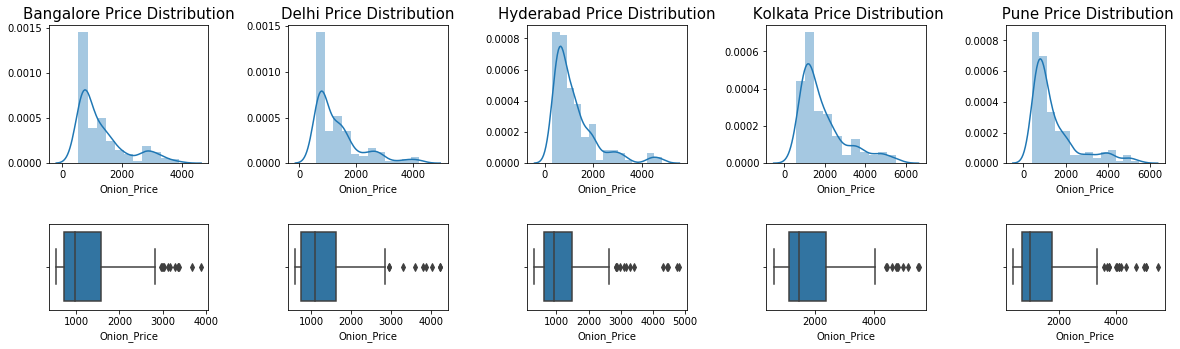

In [79]:
from matplotlib import gridspec
plt.rcParams['figure.figsize'] = [20,10]
gs = gridspec.GridSpec(5,5, width_ratios=[15, 15, 15, 15, 15], height_ratios=[.80, .50, .15, .15, .15],hspace =1, wspace=0.5)
a1 = plt.subplot(gs[0, 0])
a1.set_title("Bangalore Price Distribution", fontsize=15)
a1=sns.distplot(data[data['Location']=='Bangalore']['Onion_Price'])

a2 = plt.subplot(gs[0, 1])
a2.set_title("Delhi Price Distribution", fontsize=15)
a2=sns.distplot(data[data['Location']=='Delhi']['Onion_Price'])

a3 = plt.subplot(gs[0, 2])
a3.set_title("Hyderabad Price Distribution", fontsize=15)
a3=sns.distplot(data[data['Location']=='Hyderabad']['Onion_Price'])

a4 = plt.subplot(gs[0, 3])
a4.set_title(" Kolkata Price Distribution", fontsize=15)
a4=sns.distplot(data[data['Location']=='Kolkata']['Onion_Price'])

a5 = plt.subplot(gs[0, 4])
a5.set_title(" Pune Price Distribution", fontsize=15)
a5=sns.distplot(data[data['Location']=='Pune']['Onion_Price'])

b1 = plt.subplot(gs[1, 0])
b1= sns.boxplot(data[data['Location']=='Bangalore']['Onion_Price'])

b2 = plt.subplot(gs[1, 1])
b2= sns.boxplot(data[data['Location']=='Delhi']['Onion_Price'])

b3 = plt.subplot(gs[1, 2])
b3= sns.boxplot(data[data['Location']=='Hyderabad']['Onion_Price'])


b4 = plt.subplot(gs[1, 3])
b4= sns.boxplot(data[data['Location']=='Kolkata']['Onion_Price'])

b5 = plt.subplot(gs[1, 4])
b5 = sns.boxplot(data[data['Location']=='Pune']['Onion_Price'])




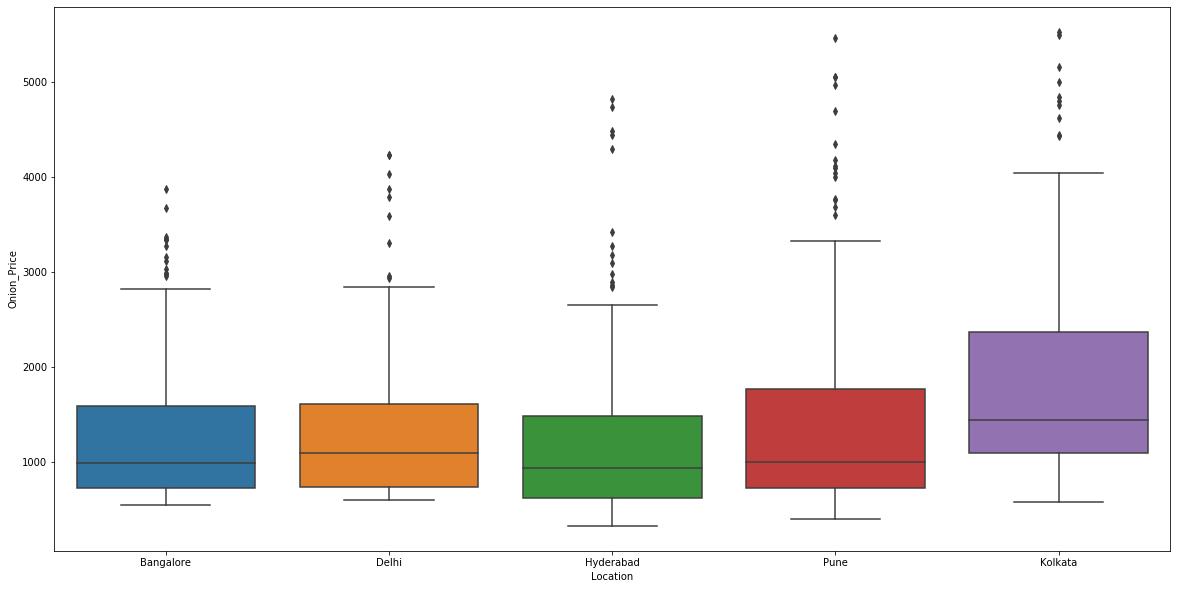

In [83]:
sns.boxplot(x='Location',y='Onion_Price', data=data)
plt.show()

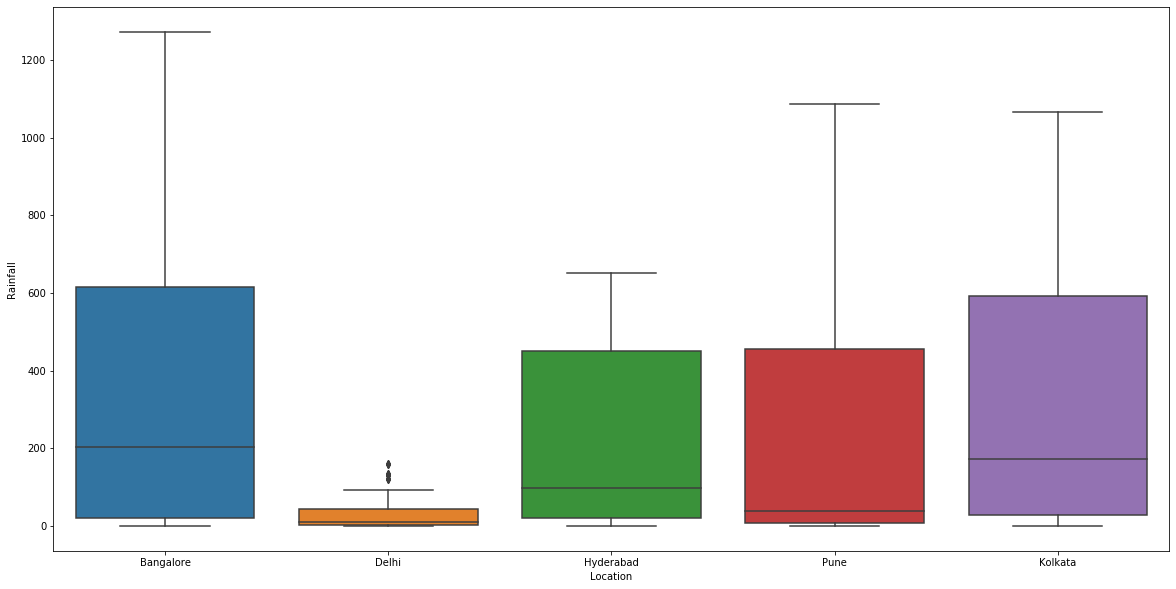

In [84]:
sns.boxplot(x='Location',y='Rainfall', data=data)
plt.show()

In [64]:
data['Onion_Price']

0      1200.0
1      1359.0
2      1208.0
3      1352.0
4      1323.0
        ...  
785    4625.0
786       NaN
787       NaN
788       NaN
789       NaN
Name: Onion_Price, Length: 790, dtype: float64

In [87]:
corr = data.corr()
corr

,Year,CW,Onion_Price,Rainfall
Year,1.000000,-0.013361,-0.293891,0.011832
CW,-0.013361,1.000000,0.384102,0.193348
Onion_Price,-0.293891,0.384102,1.000000,0.168112
Rainfall,0.011832,0.193348,0.168112,1.000000


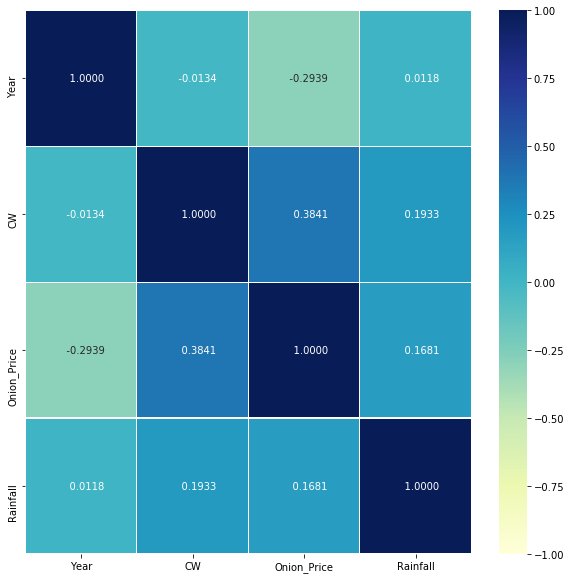

In [89]:
fig,ax = plt.subplots(figsize=(10, 10))
sns.heatmap(corr, annot = True, linewidths = 0.05, vmin = -1 , vmax = 1, cmap = "YlGnBu" , fmt = '10.4f')
plt.show()